In [230]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
from rlway.pyosrd import OSRD

In [232]:
OSRD.use_cases

['cvg_dvg', 'point_switch', 'station_capacity2']

In [302]:
use_case='point_switch'
sim = OSRD(use_case=use_case, dir='tmp')

[18:14:01,844] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[18:14:01,875] [INFO]              [FullInfra] parsing infra
[18:14:01,938] [INFO]              [FullInfra] adaptation to kotlin
[18:14:01,970] [INFO]              [FullInfra] loading signals
[18:14:01,976] [INFO]              [FullInfra] building blocks
[18:14:01,980] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[18:14:01,993] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.44
[18:14:02,041] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.45
[18:14:02,046] [INFO]  [StandaloneSimulationCommand] All simulations completed
[18:14:02,046] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


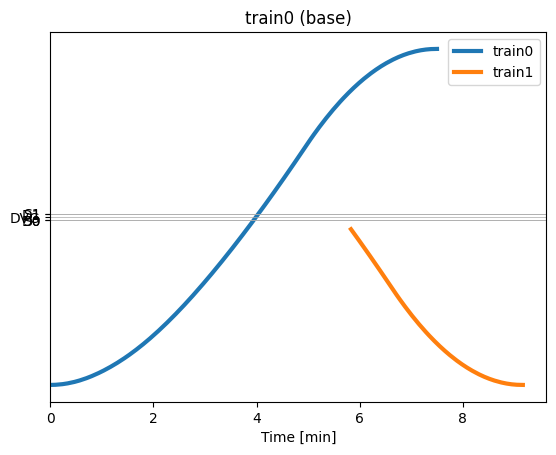

In [303]:
ax = sim.space_time_graph(0, points_to_show=['signal', 'detector','switch', 'station'])

In [304]:
sim.points_encountered_by_train(0)

[{'id': 'departure_train0', 'offset': 0.0, 'type': 'departure', 't_base': 0.0},
 {'id': 'S0',
  'offset': 9750.0,
  'type': 'signal',
  't_base': 236.59084378700044},
 {'id': 'D0',
  'offset': 9770.0,
  'type': 'detector',
  't_base': 236.87974331937096},
 {'id': 'DVG',
  'offset': 9950.0,
  'type': 'switch',
  't_base': 239.4798391107056},
 {'id': 'D1',
  'offset': 10130.0,
  'type': 'detector',
  't_base': 242.07993490204026},
 {'id': 'S1',
  'offset': 10150.0,
  'type': 'signal',
  't_base': 242.3688344344108},
 {'id': 'arrival_train0',
  'offset': 19900.0,
  'type': 'arrival',
  't_base': 450.2103472703495}]

In [306]:
sim.route_tvds

{'rt.buffer_stop.0->D0': 'D0<->buffer_stop.0',
 'rt.D0->buffer_stop.1': 'DVG',
 'rt.D0->buffer_stop.2': 'DVG',
 'rt.buffer_stop.1->D1': 'D1<->buffer_stop.1',
 'rt.D1->buffer_stop.0': 'DVG',
 'rt.buffer_stop.2->D2': 'D2<->buffer_stop.2',
 'rt.D2->buffer_stop.0': 'DVG'}

In [307]:
sim.route_switches

{'rt.D0->buffer_stop.1': 'DVG',
 'rt.D0->buffer_stop.2': 'DVG',
 'rt.D1->buffer_stop.0': 'DVG',
 'rt.D2->buffer_stop.0': 'DVG'}